<a href="https://colab.research.google.com/github/shubh28012004/News_Artiicle_Classification_Report/blob/main/NLP_ASSIGNMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SHUBH AGARWAL**


AIML B2

22070126108

# NATURAL LANGUAGE PROCESSING



---



# DATA PREPROCESSING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv("/content/train.csv")

In [4]:
train_df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


CHECKING DATA TYPE

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


CHECKING NULL VALUES

In [6]:
train_df.isnull().sum().sum()

0

STATISTICAL MEASURES

In [7]:
train_df.describe()


,Class Index
count,120000.000000
mean,2.500000
std,1.118039
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


In [8]:
train_df.shape

(120000, 3)

In [9]:
train_df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


Doing followng Preprocessing STEPS using NLTK or SpaCy:
    a) Tokenization, Lemmatization
    b) Data Cleansing: Remove stopwords, remove symbols, remove URLS.

In [10]:
# Importing required packages for Text Preprocessing
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re


In [11]:
# Loading a small english model from spacy library which will help to perform NLP tasks like tokenization , lemmatization and more
nlp = spacy.load('en_core_web_sm')



---



# EXPLORATORY DATA ANALYSIS

**1. Distribution of Classes**
We will examine how many samples belong to each class to understand if the dataset is balanced.

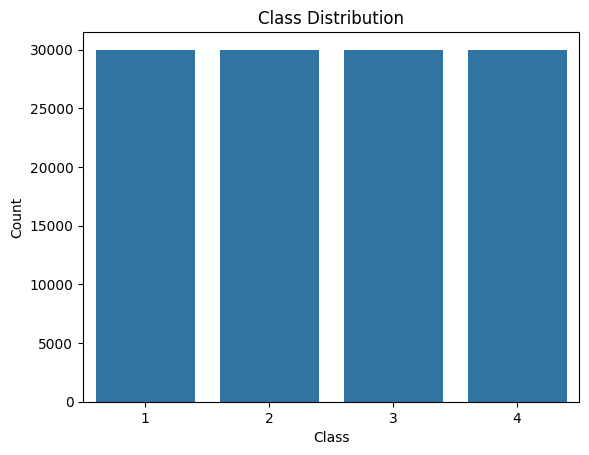

Class Index
3    25.0
4    25.0
2    25.0
1    25.0
Name: proportion, dtype: float64


In [12]:
sns.countplot(x=train_df['Class Index'],data=train_df)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

class_dis = train_df['Class Index'].value_counts(normalize = True )*100
print(class_dis)

**2. Length of Descriptions**
Analyzing the length of the descriptions can give insights into how verbose the descriptions are and whether the length varies significantly across different classes.

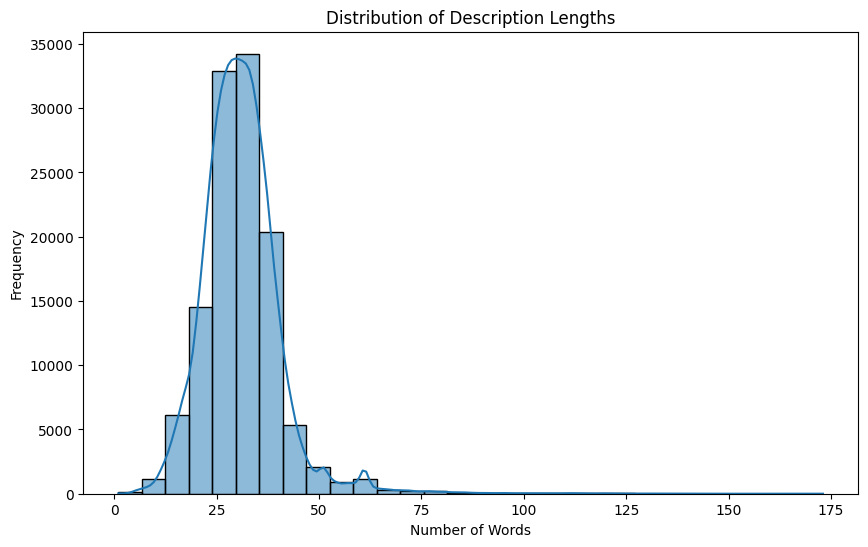

Class Index
1    31.631600
2    31.339433
3    30.739967
4    30.531033
Name: Description_Length, dtype: float64


In [13]:
# Calculate the length of each description
train_df['Description_Length'] = train_df['Description'].apply(lambda x: len(x.split()))

# Plot the distribution of description lengths
plt.figure(figsize=(10,6))
sns.histplot(train_df['Description_Length'], kde=True, bins=30)
plt.title('Distribution of Description Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Average description length by class
avg_length_by_class = train_df.groupby('Class Index')['Description_Length'].mean()
print(avg_length_by_class)


**3. Common Words in Descriptions**
To understand the common themes in the descriptions, we can look at the most frequent words used in each class.





---



# TEXT PREPROCESSING

**1. Removing URLs**


*   Definition: URLs (Uniform Resource Locators) are links to web pages that might be present in text data. These are often irrelevant to the text analysis tasks, such as classification or sentiment analysis. Removing URLs helps in focusing on the actual content of the text.
*   Example: In the text "Check out this link: https://example.com", the URL "https://example.com" would be removed, leaving "Check out this link".




**2.  Removing Symbols and Numbers:**


*   Definition: Symbols and numbers are often not useful for text analysis, especially when focusing on the linguistic content. Removing these elements helps in cleaning the data and reducing noise.
Removing Digits: This step eliminates numeric characters from the text.
Removing Punctuation and Symbols: This step removes special characters like punctuation marks, which might not contribute to the meaning in certain NLP tasks.

*   Example: The text "Price: $100, Qty: 50!" would be cleaned to "Price Qty".





**3. Tokenization:**


*   Definition: Tokenization is the process of splitting text into individual words or terms (tokens). It is a fundamental step in text preprocessing that allows further analysis at the word level.
*   Example: The sentence "Tokenization splits text into words." would be tokenized into ["Tokenization", "splits", "text", "into", "words"].



**4. Lemmatization:**


*   Definition: Lemmatization is the process of reducing words to their base or root form (lemma). Unlike stemming, which simply cuts off word endings, lemmatization considers the context and transforms words into their meaningful base forms.
*   Example: The words "running", "ran", and "runs" would all be lemmatized to "run".




**5.  Stopwords Removal:**


*   Definition: Stopwords are common words like "the", "is", "in", etc., that typically do not carry significant meaning in text analysis. Removing stopwords helps in reducing the dimensionality of the text data and focuses on the words that contribute more to the overall meaning.
*   Example: In the sentence "The cat is on the mat", removing stopwords would result in "cat mat".



In [17]:
train_df['text'] = train_df['Title'] + ' ' + train_df['Description']
test_df['text'] = test_df['Title'] + ' ' + test_df['Description']

# Data Cleansing Function
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Tokenization
    tokens = word_tokenize(text)
    # Lemmatization and stopword removal
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

train_df['cleaned_text'] = train_df['text'].apply(preprocess_text)
test_df['cleaned_text'] = test_df['text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Analysing Test Data


In [15]:
test_df = pd.read_csv('/content/test.csv')
test_df.head()


,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [16]:
test_df.isnull().sum().sum()

0

# VECTORIZATION


Definition: Vectorization is the process of converting text data (which is unstructured and not directly understandable by machine learning models) into numerical format, specifically into vectors (arrays of numbers). These vectors represent the text data in a structured form that models can process and analyze.

Purpose: Text data is inherently complex and varied, so vectorization transforms this data into a format that can be used as input for machine learning algorithms, enabling tasks such as classification, clustering, and more.



**1. Count Vectorization**





Definition: Count Vectorization is a technique that converts a collection of text documents into a matrix of token counts. It is a simple and straightforward way to represent the text where each word's occurrence is counted, and these counts are stored in a vector.



Example: Document : [1, 1, 1, 1, 0, 0] (counts of words in the first document)

**2. TF-IDF Vectorization**

Definition: TF-IDF (Term Frequency-Inverse Document Frequency) is an advanced vectorization technique that not only counts word occurrences but also adjusts for the importance of words. It balances the frequency of a word with its rarity across all documents, giving more weight to less common but potentially more meaningful words.



Suppose the word "data" appears frequently in one document but is rare in others. The TF-IDF score for "data" in that document will be higher, reflecting its significance in that context.


In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Vectorizers
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_count = count_vectorizer.fit_transform(train_df['cleaned_text'])
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['cleaned_text'])

# Transform the test data
X_test_count = count_vectorizer.transform(test_df['cleaned_text'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['cleaned_text'])


In [19]:
X_train_count

<120000x53243 sparse matrix of type '<class 'numpy.int64'>'
	with 2452242 stored elements in Compressed Sparse Row format>

In [20]:
X_train_tfidf

<120000x53243 sparse matrix of type '<class 'numpy.float64'>'
	with 2452242 stored elements in Compressed Sparse Row format>

#  Machine Learning Algorithms

 Use following ML algorithms:
    a) Logistic Regression with CountVectorizer, TFIDFVectorizer
    b) SVC with CountVectorizer, TFIDFVectorizer
    c) RF with CountVectorizer, TFIDFVectorizer


TO GET BEST RESULTS WE CAN USE GRIDSEARCHCV



---








Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression with CountVectorizer - Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.89      0.91      1900
           2       0.96      0.97      0.96      1900
           3       0.86      0.88      0.87      1900
           4       0.88      0.88      0.88      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



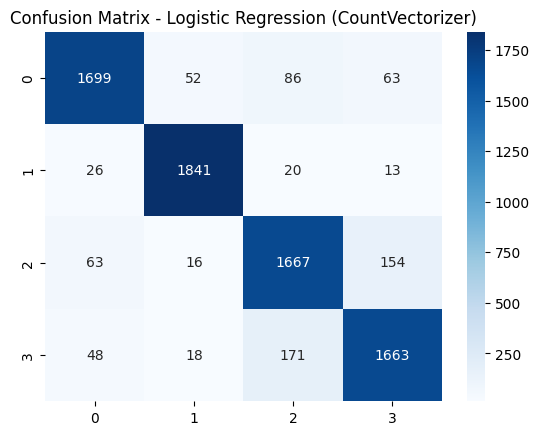

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression with TFIDFVectorizer - Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.90      0.92      1900
           2       0.95      0.98      0.97      1900
           3       0.88      0.88      0.88      1900
           4       0.89      0.89      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



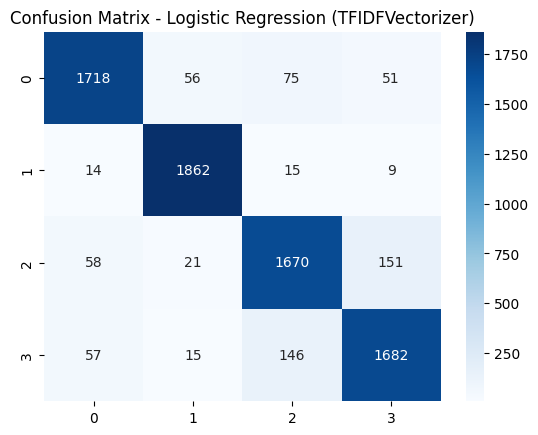

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_train = train_df['Class Index']
y_test = test_df['Class Index']

# Logistic Regression with CountVectorizer
lr_count = LogisticRegression()
lr_count.fit(X_train_count, y_train)
y_pred_count = lr_count.predict(X_test_count)

print('Logistic Regression with CountVectorizer - Classification Report:')
print(classification_report(y_test, y_pred_count))

cm_count = confusion_matrix(y_test, y_pred_count)
sns.heatmap(cm_count, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (CountVectorizer)')
plt.show()

# Logistic Regression with TFIDFVectorizer
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)

print('Logistic Regression with TFIDFVectorizer - Classification Report:')
print(classification_report(y_test, y_pred_tfidf))

cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (TFIDFVectorizer)')
plt.show()


SVC

SVC with CountVectorizer - Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.91      0.92      1900
           2       0.95      0.98      0.97      1900
           3       0.89      0.89      0.89      1900
           4       0.89      0.90      0.90      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92      7600



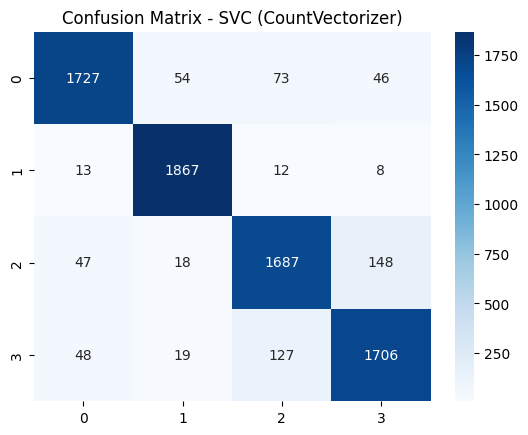

In [ ]:
from sklearn.svm import SVC

# SVC with CountVectorizer
svc_count = SVC()
svc_count.fit(X_train_count, y_train)
y_pred_count = svc_count.predict(X_test_count)

print('SVC with CountVectorizer - Classification Report:')
print(classification_report(y_test, y_pred_count))

cm_count = confusion_matrix(y_test, y_pred_count)
sns.heatmap(cm_count, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVC (CountVectorizer)')
plt.show()

# SVC with TFIDFVectorizer
svc_tfidf = SVC()
svc_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = svc_tfidf.predict(X_test_tfidf)

print('SVC with TFIDFVectorizer - Classification Report:')
print(classification_report(y_test, y_pred_tfidf))

cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVC (TFIDFVectorizer)')
plt.show()


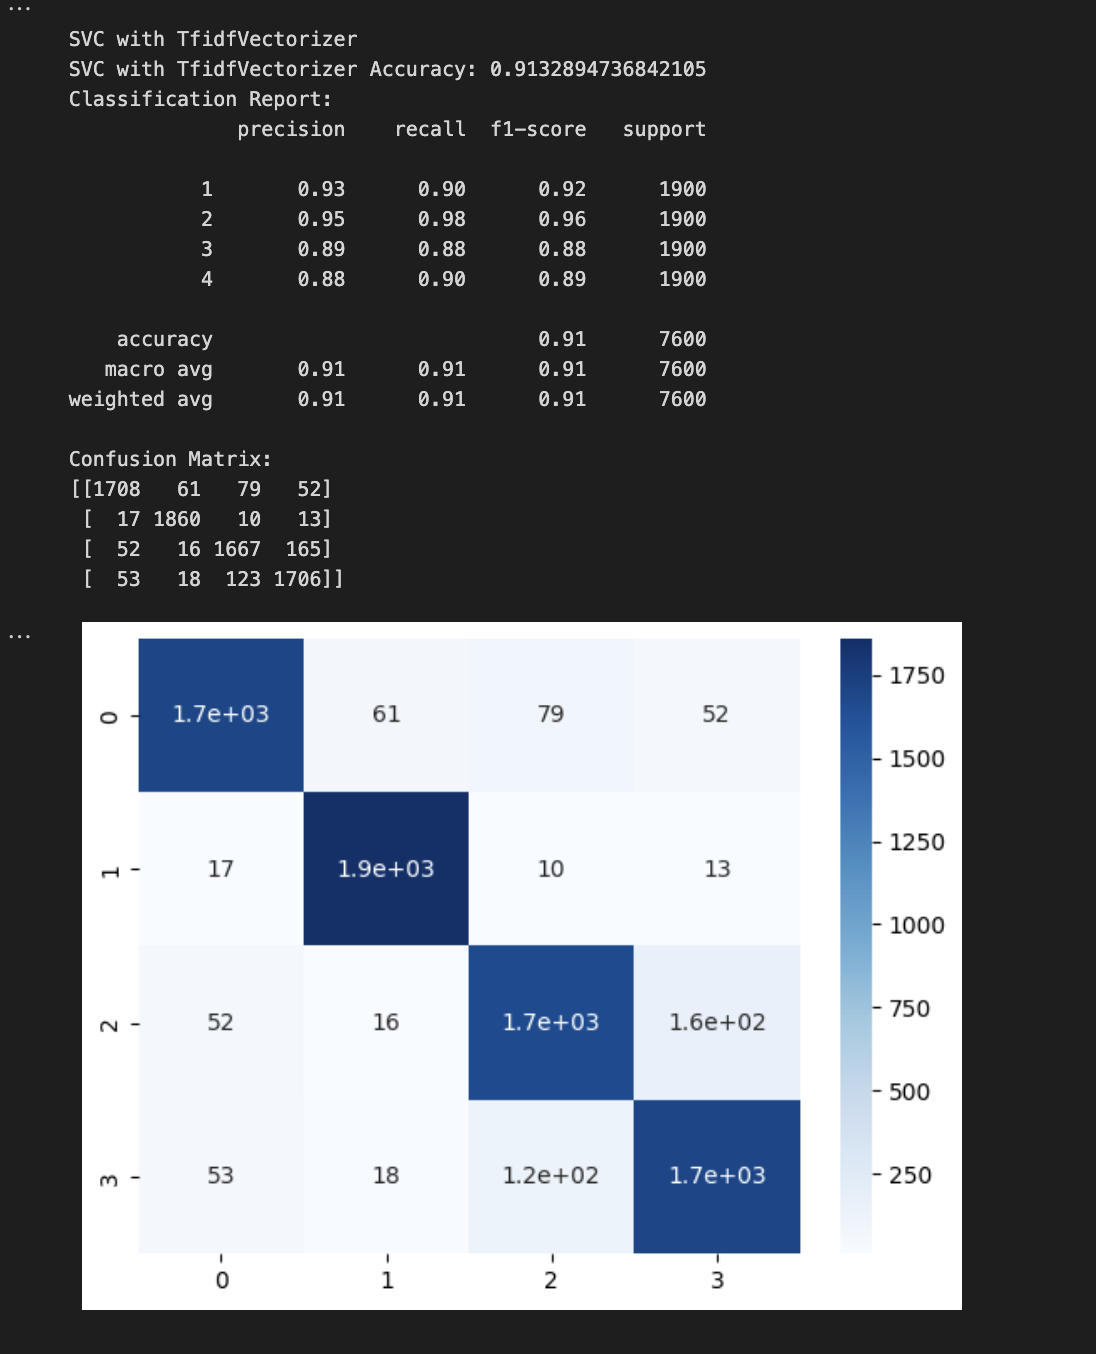

Random Forest


Random Forest with CountVectorizer - Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.89      0.90      1900
           2       0.92      0.97      0.95      1900
           3       0.86      0.85      0.86      1900
           4       0.87      0.86      0.87      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



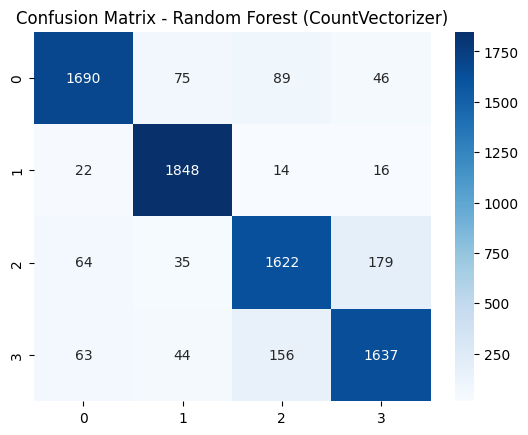

Random Forest with TFIDFVectorizer - Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.89      0.90      1900
           2       0.92      0.97      0.95      1900
           3       0.86      0.86      0.86      1900
           4       0.87      0.86      0.87      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



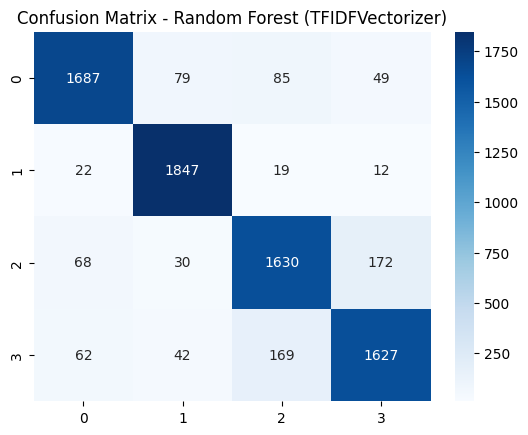

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest with CountVectorizer
rf_count = RandomForestClassifier()
rf_count.fit(X_train_count, y_train)
y_pred_count = rf_count.predict(X_test_count)

print('Random Forest with CountVectorizer - Classification Report:')
print(classification_report(y_test, y_pred_count))

cm_count = confusion_matrix(y_test, y_pred_count)
sns.heatmap(cm_count, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest (CountVectorizer)')
plt.show()

# Random Forest with TFIDFVectorizer
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = rf_tfidf.predict(X_test_tfidf)

print('Random Forest with TFIDFVectorizer - Classification Report:')
print(classification_report(y_test, y_pred_tfidf))

cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest (TFIDFVectorizer)')
plt.show()


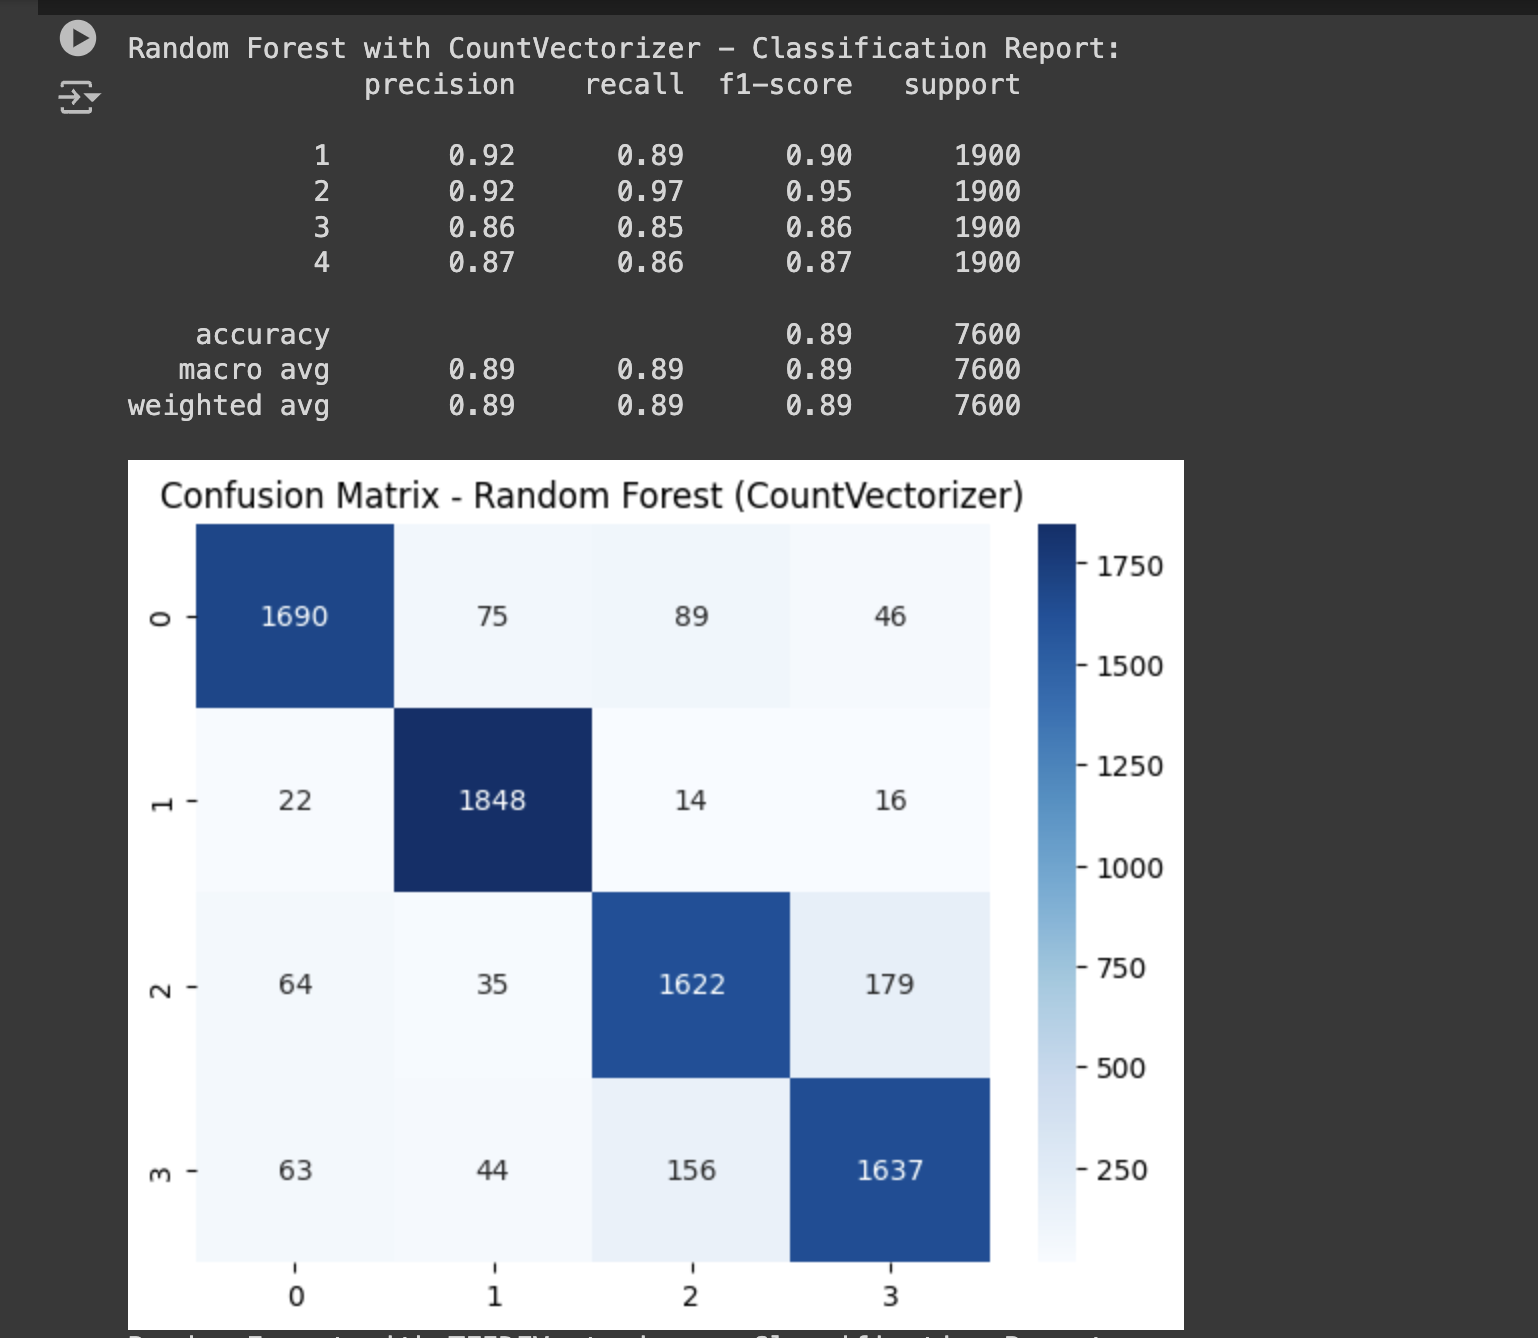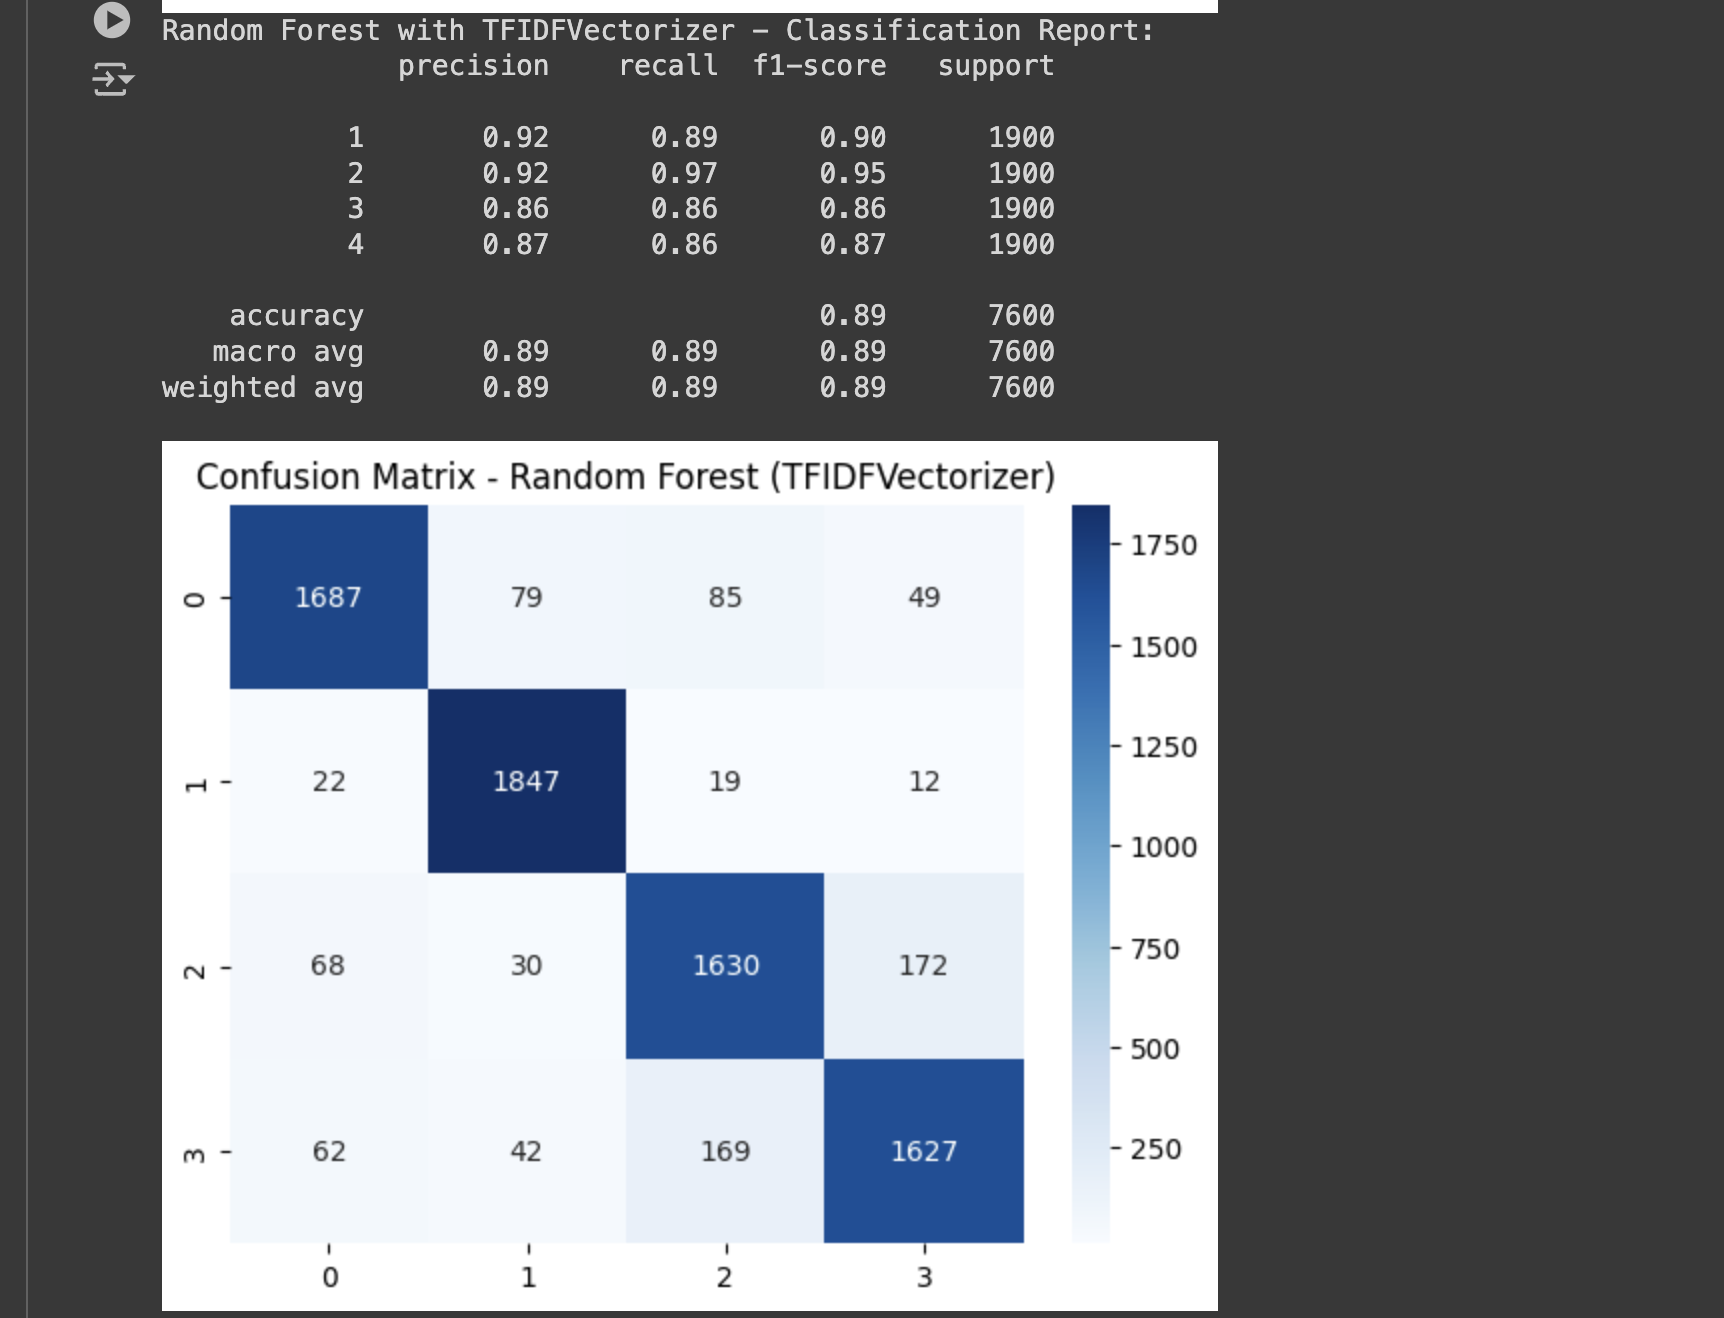

GridSearchCV for Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Parameters for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# GridSearch for CountVectorizer
grid_search_lr_count = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr_count.fit(X_train_count, y_train)

print('Best Parameters for Logistic Regression (CountVectorizer):', grid_search_lr_count.best_params_)
y_pred_count = grid_search_lr_count.predict(X_test_count)

print('Logistic Regression with CountVectorizer - Classification Report:')
print(classification_report(y_test, y_pred_count))

# GridSearch for TFIDFVectorizer
grid_search_lr_tfidf = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr_tfidf.fit(X_train_tfidf, y_train)

print('Best Parameters for Logistic Regression (TFIDFVectorizer):', grid_search_lr_tfidf.best_params_)
y_pred_tfidf = grid_search_lr_tfidf.predict(X_test_tfidf)

print('Logistic Regression with TFIDFVectorizer - Classification Report:')
print(classification_report(y_test, y_pred_tfidf))
